In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

In [2]:
airportcodeloc_df = pd.read_csv('gs://pak/Original CSV/AirportCodeLocationLookupClean.csv')
airportcodeloc_df['OriginAirportCode'] = airportcodeloc_df['AIRPORT']
airportcodeloc_df = airportcodeloc_df.drop(['AIRPORT'], axis=1)
airportcodeloc_df.head()

,AIRPORT_ID,DISPLAY_AIRPORT_NAME,LATITUDE,LONGITUDE,OriginAirportCode
0,10001,Afognak Lake Airport,58.109444,-152.906667,01A
1,10003,Bear Creek Mining Strip,65.548056,-161.071667,03A
2,10004,Lik Mining Camp,68.083333,-163.166667,04A
3,10005,Little Squaw Airport,67.570000,-148.183889,05A
4,10006,Kizhuyak Bay,57.745278,-152.882778,06A


In [3]:
flightdelay_df = pd.read_csv('gs://pak/Original CSV/FlightDelaysWithAirportCodes.csv')
# Creating bins for DepTimeRange
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
slot = ['12 AM - 1 AM','1 AM - 2 AM','2 AM - 3 AM', '3 AM - 4 AM','4 AM - 5 AM','5 AM - 6 AM','6 AM - 7 AM','7 AM - 8 AM','8 AM - 9 AM','9 AM - 10 AM','10 AM - 11 AM','11 AM - 12 PM',
        '12 PM - 1 PM','2 PM - 2 PM','2 PM - 3 PM','3 PM - 4 PM','4 PM - 5 PM','5 PM - 6 PM','6 PM - 7 PM','7 PM - 8 PM','8 PM - 9 PM','9 PM - 10 PM','10 PM - 11 PM','11 PM - 12 AM']
flightdelay_df['DepTimeRange']=pd.cut(flightdelay_df['CRSDepTime'],bins,labels=slot)
flightdelay_df = flightdelay_df.drop(['DepDelay','CRSDepTime','CRSArrTime','ArrDelay','DestAirportCode','DestAirportName','DestLatitude','DestLongitude'], axis=1)
flightdelay_df = flightdelay_df.drop_duplicates(keep=False)
flightdelay_df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,DepDel15,ArrDel15,Cancelled,OriginAirportCode,OriginAirportName,OriginLatitude,OriginLongitude,DepTimeRange
2,2013,4,19,5,DL,0.0,0,0,PDX,Portland International,45.588611,-122.596944,5 AM - 6 AM
3,2013,4,19,5,DL,1.0,1,0,STL,Lambert-St. Louis International,38.748611,-90.370000,4 PM - 5 PM
12,2013,4,19,5,DL,1.0,1,0,DFW,Dallas/Fort Worth International,32.897222,-97.037778,11 AM - 12 PM
15,2013,4,19,5,DL,1.0,1,0,JAX,Jacksonville International,30.494167,-81.687778,6 PM - 7 PM
16,2013,4,19,5,DL,0.0,0,0,LGA,LaGuardia,40.777222,-73.872500,9 AM - 10 AM


In [4]:
flightdelay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953419 entries, 2 to 2719415
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               953419 non-null  int64   
 1   Month              953419 non-null  int64   
 2   DayofMonth         953419 non-null  int64   
 3   DayOfWeek          953419 non-null  int64   
 4   Carrier            953419 non-null  object  
 5   DepDel15           931881 non-null  float64 
 6   ArrDel15           953419 non-null  int64   
 7   Cancelled          953419 non-null  int64   
 8   OriginAirportCode  953419 non-null  object  
 9   OriginAirportName  953419 non-null  object  
 10  OriginLatitude     953419 non-null  float64 
 11  OriginLongitude    953419 non-null  float64 
 12  DepTimeRange       953419 non-null  category
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 95.5+ MB


In [5]:
flightweather_df = pd.read_csv('gs://pak/Original CSV/FlightWeatherWithAirportCode.csv')
# Creating bins for DepTimeRange
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
slot = ['12 AM - 1 AM','1 AM - 2 AM','2 AM - 3 AM', '3 AM - 4 AM','4 AM - 5 AM','5 AM - 6 AM','6 AM - 7 AM','7 AM - 8 AM','8 AM - 9 AM','9 AM - 10 AM','10 AM - 11 AM','11 AM - 12 PM',
        '12 PM - 1 PM','2 PM - 2 PM','2 PM - 3 PM','3 PM - 4 PM','4 PM - 5 PM','5 PM - 6 PM','6 PM - 7 PM','7 PM - 8 PM','8 PM - 9 PM','9 PM - 10 PM','10 PM - 11 PM','11 PM - 12 AM']
flightweather_df['DepTimeRange']=pd.cut(flightweather_df['Time'],bins,labels=slot)
flightweather_df['DayofMonth'] = flightweather_df['Day']
flightweather_df['OriginAirportCode'] = flightweather_df['AirportCode']
flightweather_df = flightweather_df[['Year','Month','DayofMonth','DepTimeRange','SkyCondition','Visibility','DewPointFarenheit','WindSpeed','SeaLevelPressure','OriginAirportCode']]
flightweather_df = flightweather_df.drop_duplicates(subset=['Year','Month','DayofMonth','DepTimeRange','OriginAirportCode'], keep=False)
flightweather_df.head()

,Year,Month,DayofMonth,DepTimeRange,SkyCondition,Visibility,DewPointFarenheit,WindSpeed,SeaLevelPressure,OriginAirportCode
0,2013,4,1,12 AM - 1 AM,FEW018 SCT044 BKN070,10.00,73,13,30.06,SJU
1,2013,4,1,1 AM - 2 AM,FEW037 SCT070,10.00,71,10,30.05,SJU
2,2013,4,1,2 AM - 3 AM,FEW037 SCT070,10.00,71,9,30.03,SJU
3,2013,4,1,3 AM - 4 AM,FEW025 SCT070,10.00,70,9,30.03,SJU
4,2013,4,1,4 AM - 5 AM,FEW025,10.00,70,7,30.04,SJU


In [6]:
flightweather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296078 entries, 0 to 406506
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               296078 non-null  int64   
 1   Month              296078 non-null  int64   
 2   DayofMonth         296078 non-null  int64   
 3   DepTimeRange       296037 non-null  category
 4   SkyCondition       296078 non-null  object  
 5   Visibility         296078 non-null  object  
 6   DewPointFarenheit  296078 non-null  object  
 7   WindSpeed          296054 non-null  object  
 8   SeaLevelPressure   296078 non-null  object  
 9   OriginAirportCode  296078 non-null  object  
dtypes: category(1), int64(3), object(6)
memory usage: 22.9+ MB


In [7]:
df1 = pd.merge(flightdelay_df,airportcodeloc_df,how='inner',on='OriginAirportCode')
df1['OriginLatitude'] = df1['LATITUDE']
df1['OriginLongitude'] = df1['LONGITUDE']
df1 = df1.drop(['AIRPORT_ID','DISPLAY_AIRPORT_NAME','LATITUDE','LONGITUDE'], axis=1)
df1.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,DepDel15,ArrDel15,Cancelled,OriginAirportCode,OriginAirportName,OriginLatitude,OriginLongitude,DepTimeRange
0,2013,4,19,5,DL,0.0,0,0,PDX,Portland International,45.588611,-122.596944,5 AM - 6 AM
1,2013,4,18,4,DL,0.0,1,0,PDX,Portland International,45.588611,-122.596944,6 AM - 7 AM
2,2013,4,19,5,DL,0.0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM
3,2013,4,19,5,DL,0.0,0,0,PDX,Portland International,45.588611,-122.596944,10 AM - 11 AM
4,2013,4,19,5,DL,1.0,1,0,PDX,Portland International,45.588611,-122.596944,12 AM - 1 AM


In [8]:
new_df = pd.merge(df1,flightweather_df,how='inner',on=['Year','Month','DayofMonth','DepTimeRange','OriginAirportCode'])
new_df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,DepDel15,ArrDel15,Cancelled,OriginAirportCode,OriginAirportName,OriginLatitude,OriginLongitude,DepTimeRange,SkyCondition,Visibility,DewPointFarenheit,WindSpeed,SeaLevelPressure
0,2013,4,19,5,DL,0.0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.00,46,3,30.25
1,2013,4,19,5,WN,1.0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.00,46,3,30.25
2,2013,4,19,5,OO,0.0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.00,46,3,30.25
3,2013,4,19,5,DL,0.0,0,0,PDX,Portland International,45.588611,-122.596944,10 AM - 11 AM,BKN017 OVC026,10.00,50,13,30.16
4,2013,4,19,5,F9,1.0,0,0,PDX,Portland International,45.588611,-122.596944,10 AM - 11 AM,BKN017 OVC026,10.00,50,13,30.16


In [9]:
new_df.shape

(760631, 18)

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760631 entries, 0 to 760630
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               760631 non-null  int64   
 1   Month              760631 non-null  int64   
 2   DayofMonth         760631 non-null  int64   
 3   DayOfWeek          760631 non-null  int64   
 4   Carrier            760631 non-null  object  
 5   DepDel15           744524 non-null  float64 
 6   ArrDel15           760631 non-null  int64   
 7   Cancelled          760631 non-null  int64   
 8   OriginAirportCode  760631 non-null  object  
 9   OriginAirportName  760631 non-null  object  
 10  OriginLatitude     760631 non-null  float64 
 11  OriginLongitude    760631 non-null  float64 
 12  DepTimeRange       760631 non-null  category
 13  SkyCondition       760631 non-null  object  
 14  Visibility         760631 non-null  object  
 15  DewPointFarenheit  760631 non-null

In [11]:
new_df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Carrier                  0
DepDel15             16107
ArrDel15                 0
Cancelled                0
OriginAirportCode        0
OriginAirportName        0
OriginLatitude           0
OriginLongitude          0
DepTimeRange             0
SkyCondition             0
Visibility               0
DewPointFarenheit        0
WindSpeed               35
SeaLevelPressure         0
dtype: int64

<AxesSubplot:>

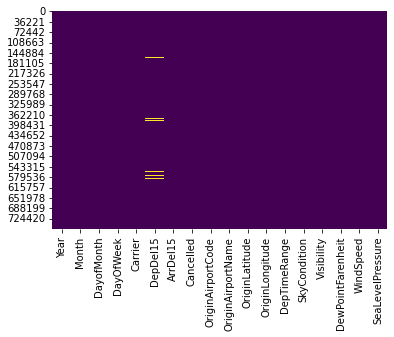

In [12]:
sns.heatmap(new_df.isnull(),cbar=False,cmap='viridis')

In [13]:
new_df.loc[(new_df['Cancelled'] == 1) & (new_df['DepDel15'].isnull() == True), 'DepDel15'] = 1.0
new_df = new_df.dropna(subset=['WindSpeed'], axis=0)

In [14]:
new_df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
DepDel15             0
ArrDel15             0
Cancelled            0
OriginAirportCode    0
OriginAirportName    0
OriginLatitude       0
OriginLongitude      0
DepTimeRange         0
SkyCondition         0
Visibility           0
DewPointFarenheit    0
WindSpeed            0
SeaLevelPressure     0
dtype: int64

In [15]:
new_df = new_df.loc[new_df['SeaLevelPressure'] != 'M']
new_df = new_df.loc[new_df['Visibility'] != 'M']
new_df = new_df.loc[new_df['DewPointFarenheit'] != 'M']
new_df = new_df.loc[new_df['WindSpeed'] != 'M']
new_df['Visibility'] = new_df['Visibility'].astype(float)
new_df['DewPointFarenheit'] = new_df['DewPointFarenheit'].astype(float)
new_df['WindSpeed'] = new_df['WindSpeed'].astype(float)
new_df['SeaLevelPressure'] = new_df['SeaLevelPressure'].astype(float)
new_df['DepDel15'] = new_df['DepDel15'].astype(int)

In [16]:
# Creating variable to store numeric columns
outlier_col = ["Visibility", "DewPointFarenheit","WindSpeed", "SeaLevelPressure"] 

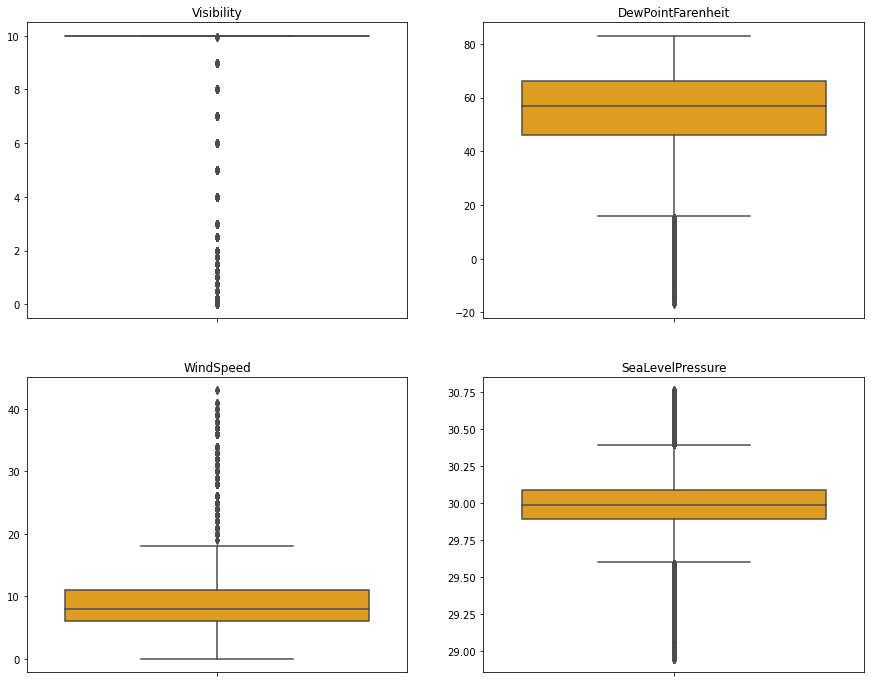

In [17]:
#Boxplotting to determine the Outliers of above listed columns
import itertools
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = new_df[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i) 

<AxesSubplot:>

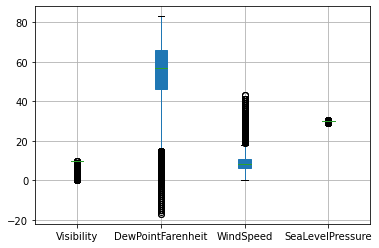

In [18]:
# Finding outliers for trip_distance, passenger_count, fare_amount, tolls_amount and tip_amount.
new_df.boxplot(column=outlier_col, widths=0.15, patch_artist=True)

In [19]:
#Evaluate column ‘Month’ to have the name displayed instead of months
condition1 = [(new_df['Month'] == 1),(new_df['Month'] == 2),(new_df['Month'] == 3),(new_df['Month'] == 4),(new_df['Month'] == 5),(new_df['Month'] == 6),
             (new_df['Month'] == 7),(new_df['Month'] == 8),(new_df['Month'] == 9),(new_df['Month'] == 10),(new_df['Month'] == 11),(new_df['Month'] == 12)]
output1 = ['January','February','March','April','May','June','July','August','September','October','November','December']
new_df['Month'] = np.select(condition1, output1, default="")

#Evaluate column ‘DayOfWeek’ to have the name displayed instead of weekdays
condition2 = [(new_df['DayOfWeek'] == 1),(new_df['DayOfWeek'] == 2),(new_df['DayOfWeek'] == 3),(new_df['DayOfWeek'] == 4),(new_df['DayOfWeek'] == 5),(new_df['DayOfWeek'] == 6),(new_df['DayOfWeek'] == 7)]
output2 = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
new_df['DayOfWeek'] = np.select(condition2, output2, default="")
new_df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,DepDel15,ArrDel15,Cancelled,OriginAirportCode,OriginAirportName,OriginLatitude,OriginLongitude,DepTimeRange,SkyCondition,Visibility,DewPointFarenheit,WindSpeed,SeaLevelPressure
0,2013,April,19,Friday,DL,0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.0,46.0,3.0,30.25
1,2013,April,19,Friday,WN,1,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.0,46.0,3.0,30.25
2,2013,April,19,Friday,OO,0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.0,46.0,3.0,30.25
3,2013,April,19,Friday,DL,0,0,0,PDX,Portland International,45.588611,-122.596944,10 AM - 11 AM,BKN017 OVC026,10.0,50.0,13.0,30.16
4,2013,April,19,Friday,F9,1,0,0,PDX,Portland International,45.588611,-122.596944,10 AM - 11 AM,BKN017 OVC026,10.0,50.0,13.0,30.16


In [20]:
print(new_df['DayOfWeek'].unique())

['Friday' 'Tuesday' 'Wednesday' 'Thursday' 'Saturday' 'Monday' 'Sunday']


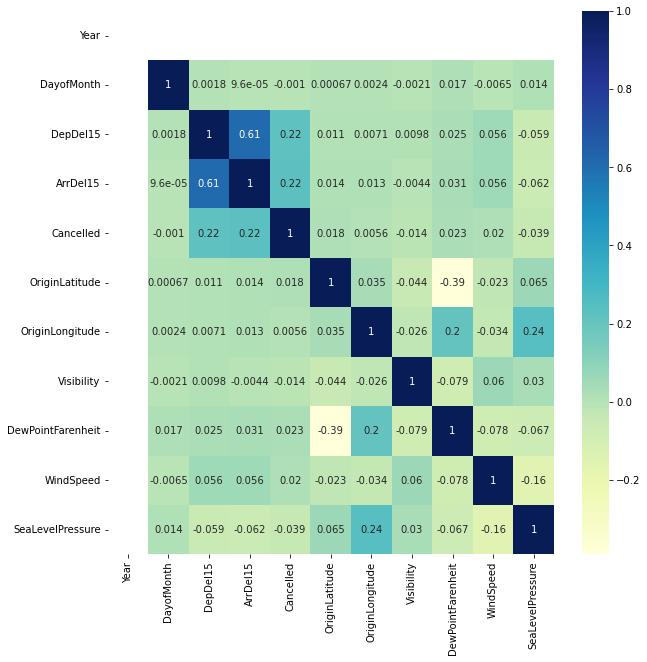

In [21]:
#Heatmap to decide best correlation
fig=plt.figure(figsize=(10,10))
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [22]:
mod_df = new_df.loc[new_df['Cancelled'] == 0]
mod_df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,DepDel15,ArrDel15,Cancelled,OriginAirportCode,OriginAirportName,OriginLatitude,OriginLongitude,DepTimeRange,SkyCondition,Visibility,DewPointFarenheit,WindSpeed,SeaLevelPressure
0,2013,April,19,Friday,DL,0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.0,46.0,3.0,30.25
1,2013,April,19,Friday,WN,1,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.0,46.0,3.0,30.25
2,2013,April,19,Friday,OO,0,0,0,PDX,Portland International,45.588611,-122.596944,6 PM - 7 PM,FEW012 BKN037 OVC055,10.0,46.0,3.0,30.25
3,2013,April,19,Friday,DL,0,0,0,PDX,Portland International,45.588611,-122.596944,10 AM - 11 AM,BKN017 OVC026,10.0,50.0,13.0,30.16
4,2013,April,19,Friday,F9,1,0,0,PDX,Portland International,45.588611,-122.596944,10 AM - 11 AM,BKN017 OVC026,10.0,50.0,13.0,30.16


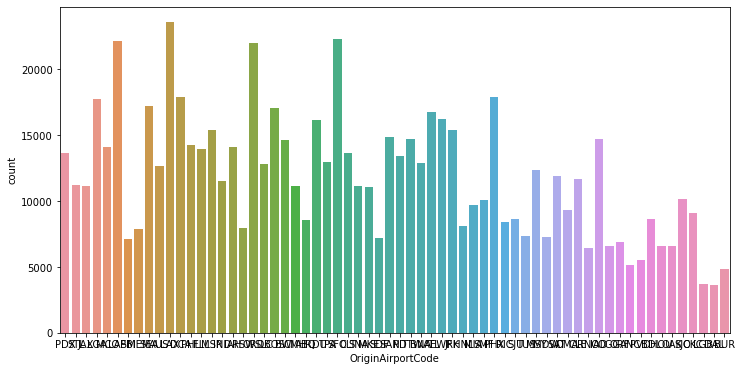

In [23]:
#Plotting the distribution graph to determine the count of the data
plt.figure(figsize=(12,6))
sns.countplot(new_df['OriginAirportCode'])
plt.show()

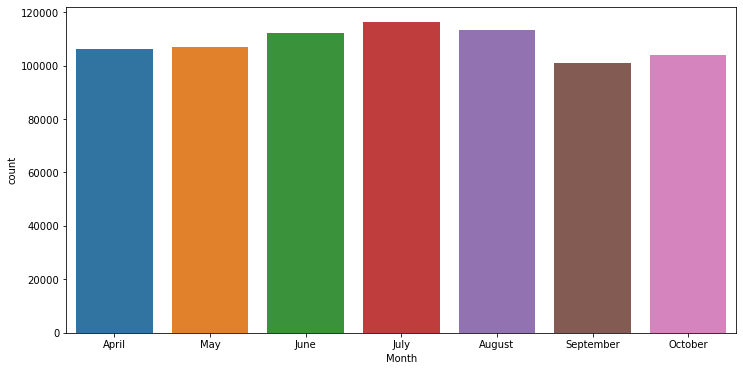

In [24]:
#Plotting the distribution graph to determine the scewness of the data
plt.figure(figsize=(12,6))
sns.countplot(new_df['Month'])
plt.show()

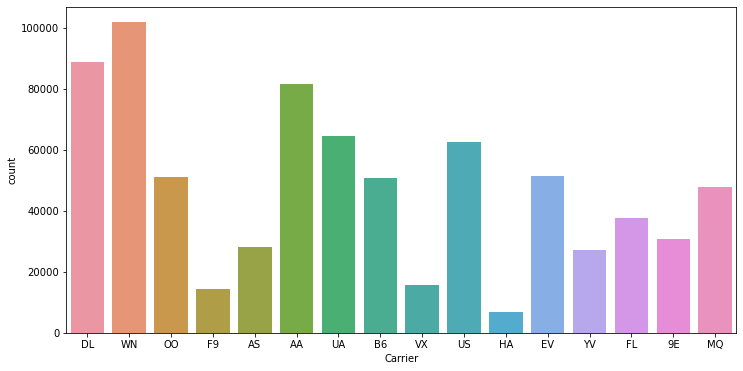

In [25]:
#Plotting the distribution graph to determine the Univariate for 'Carrier'
plt.figure(figsize=(12,6))
sns.countplot(new_df['Carrier'])
plt.show()

<AxesSubplot:xlabel='Airports', ylabel='Delay Count'>

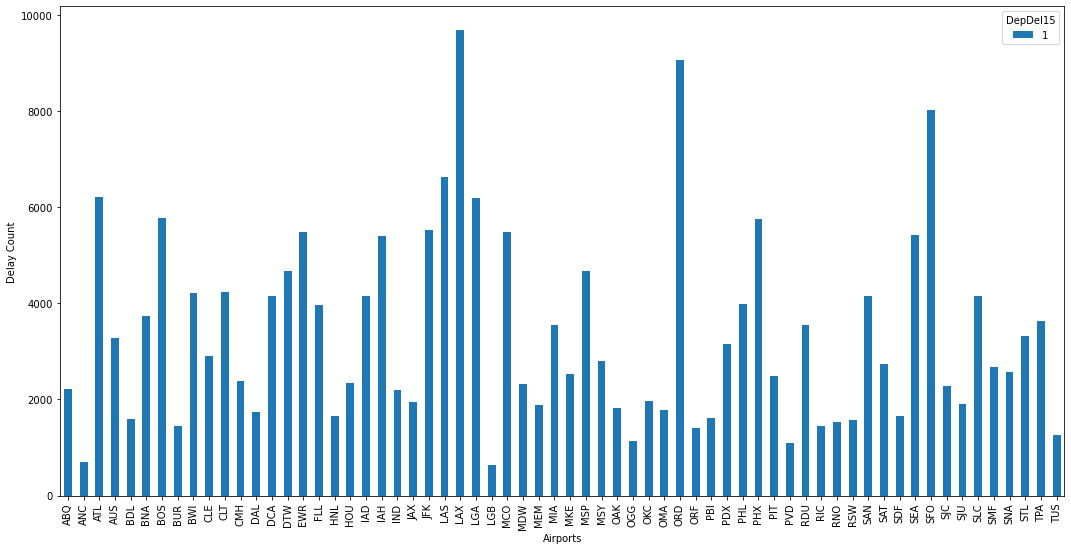

In [26]:
#bivariate analysis between delay counts and airports
new_df1 = mod_df.loc[mod_df['DepDel15'] == 1]
delay_by_airport = new_df1.groupby("OriginAirportCode").DepDel15.value_counts()
delay_by_airport.unstack().plot(kind='bar', color = ['C0'], figsize=(18,9), xlabel = 'Airports', ylabel = 'Delay Count')

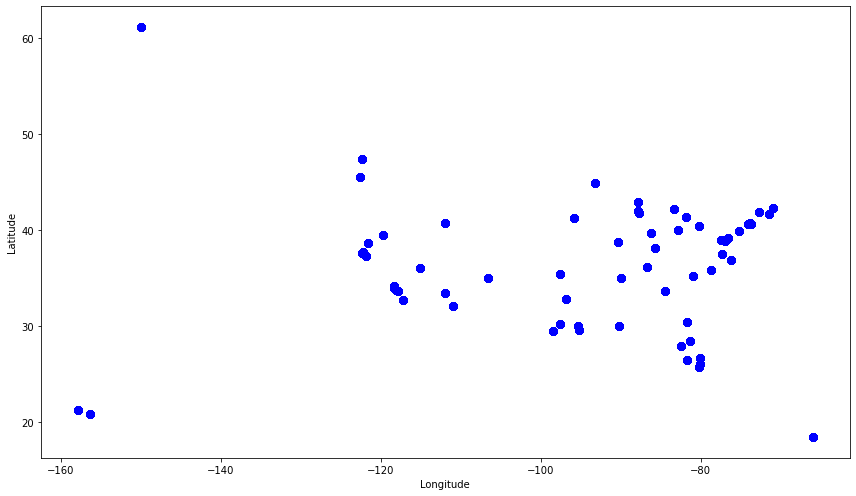

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 7), tight_layout = True)
ax1.scatter(new_df1['OriginLongitude'], new_df1['OriginLatitude'], c='blue', marker='o', s = 50)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
plt.show()

<AxesSubplot:xlabel='Airports', ylabel='Ratio'>

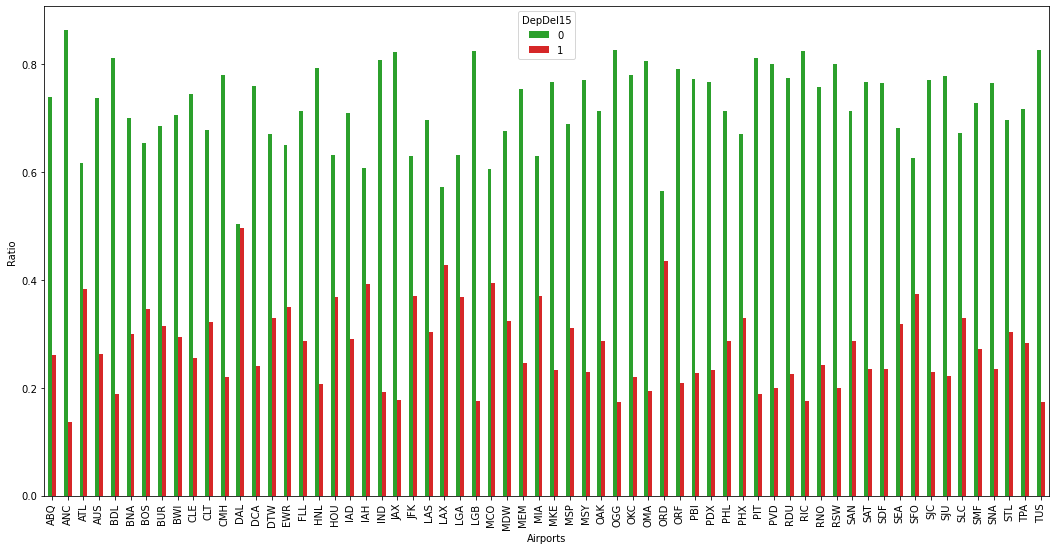

In [28]:
#bivariate analysis between airports and delay ratio
ratio_by_airport = mod_df.groupby("OriginAirportCode").DepDel15.value_counts(normalize=True)
ratio_by_airport.unstack().plot(kind='bar', color = ['C2', 'C3'], figsize=(18,9), xlabel = 'Airports', ylabel = 'Ratio')

<AxesSubplot:xlabel='Airports', ylabel='Cancellation Count'>

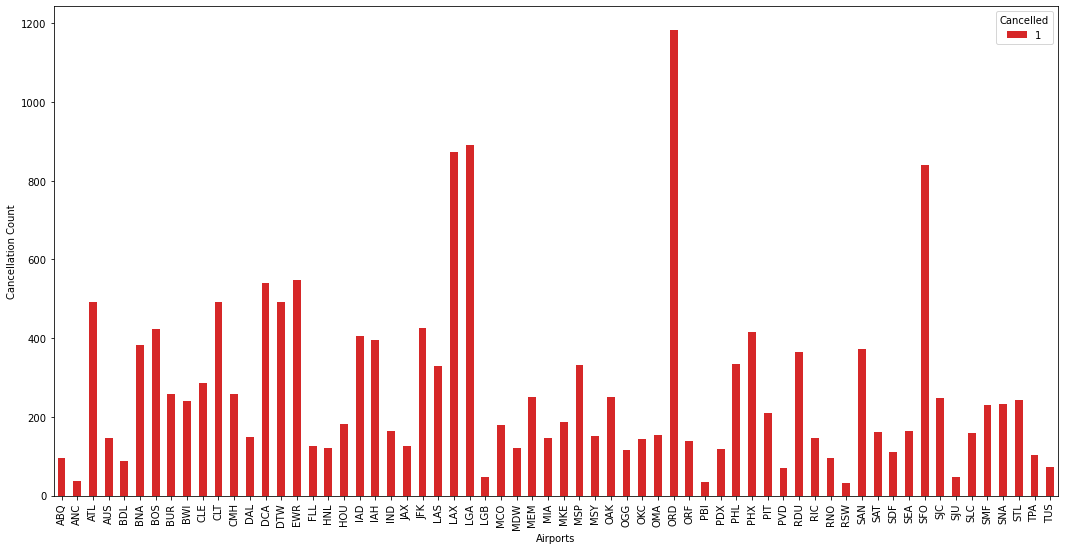

In [29]:
#bivariate analysis between delay counts and airports
new_df2 = new_df.loc[new_df['Cancelled'] == 1]
cancel_by_airport = new_df2.groupby("OriginAirportCode").Cancelled.value_counts()
cancel_by_airport.unstack().plot(kind='bar', color = ['C3'], figsize=(18,9), xlabel = 'Airports', ylabel = 'Cancellation Count')

<AxesSubplot:xlabel='Airlines', ylabel='Delay Count'>

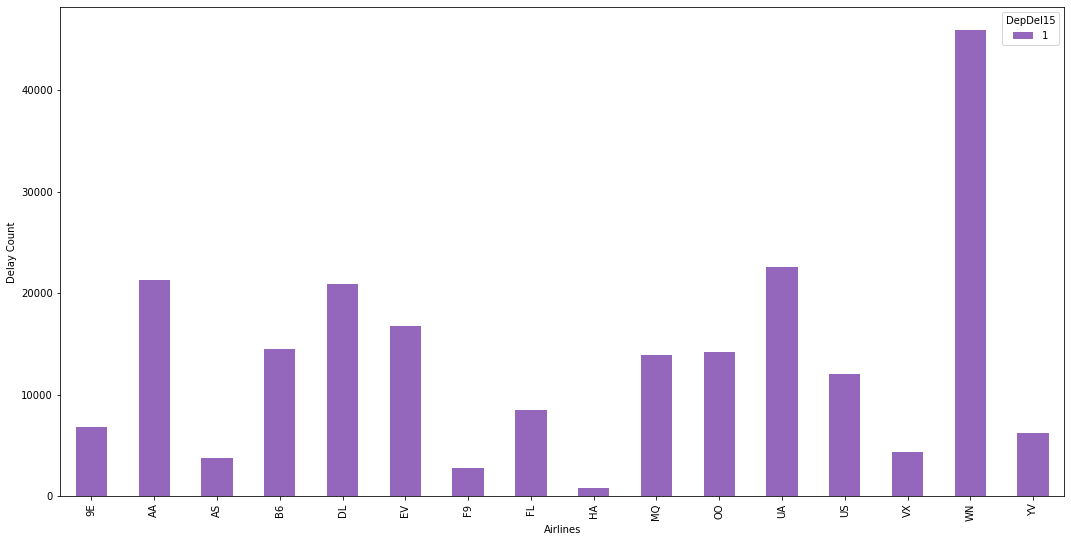

In [30]:
#bivariate analysis between delay counts and airlines
new_df1 = mod_df.loc[mod_df['DepDel15'] == 1.0]
delay_by_airlines = new_df1.groupby("Carrier").DepDel15.value_counts()
delay_by_airlines.unstack().plot(kind='bar', color = ['C4'], figsize=(18,9), xlabel = 'Airlines', ylabel = 'Delay Count')

<AxesSubplot:xlabel='Departure Delayed', ylabel='Arrival Delay Count'>

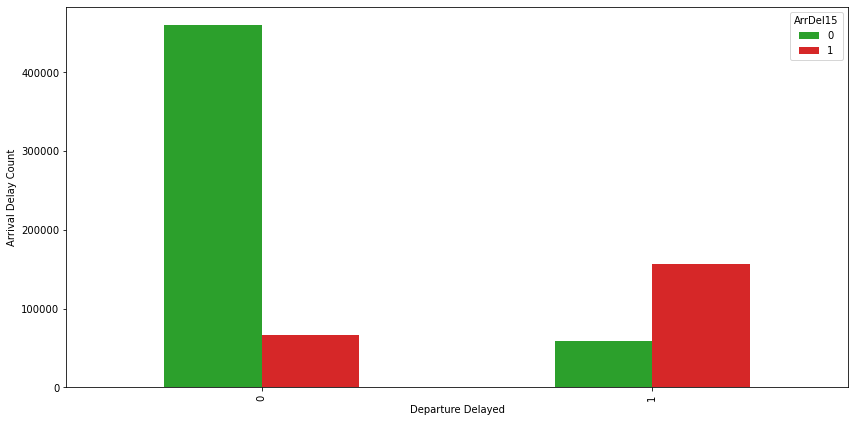

In [31]:
#bivariate analysis between airports and delay ratio
new_df1 = mod_df.loc[mod_df['ArrDel15'] == 1]
delay_by_arr = mod_df.groupby("DepDel15").ArrDel15.value_counts()
delay_by_arr.unstack().plot(kind='bar', color = ['C2', 'C3'], figsize=(14,7), xlabel = 'Departure Delayed', ylabel = 'Arrival Delay Count')

<AxesSubplot:xlabel='Weekdays', ylabel='Delay Count'>

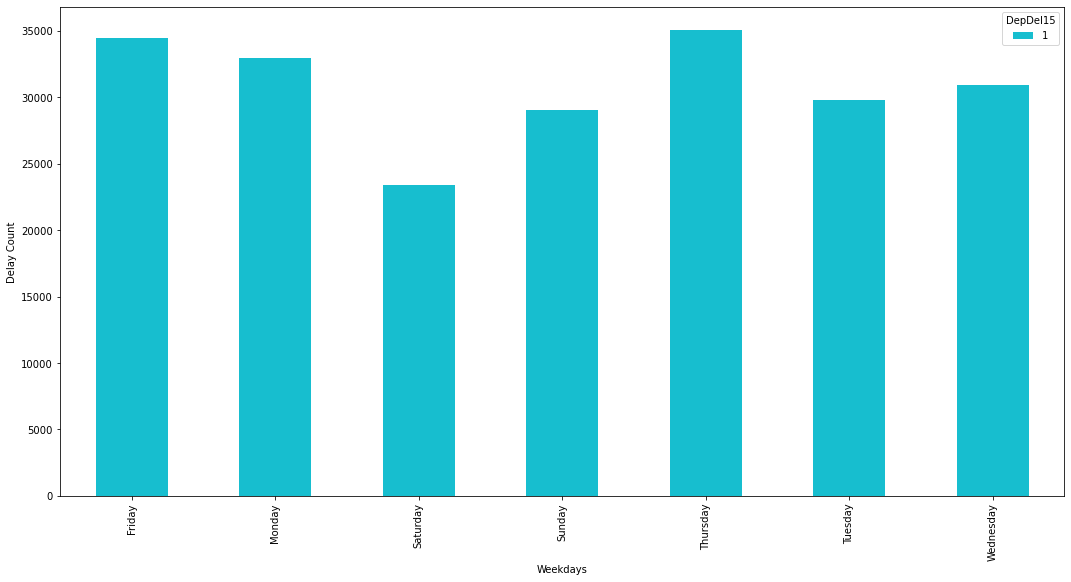

In [32]:
#bivariate analysis between delay counts and airlines
new_df1 = mod_df.loc[mod_df['DepDel15'] == 1.0]
delay_by_airlines = new_df1.groupby("DayOfWeek").DepDel15.value_counts()
delay_by_airlines.unstack().plot(kind='bar', color = ['C9'], figsize=(18,9), xlabel = 'Weekdays', ylabel = 'Delay Count')

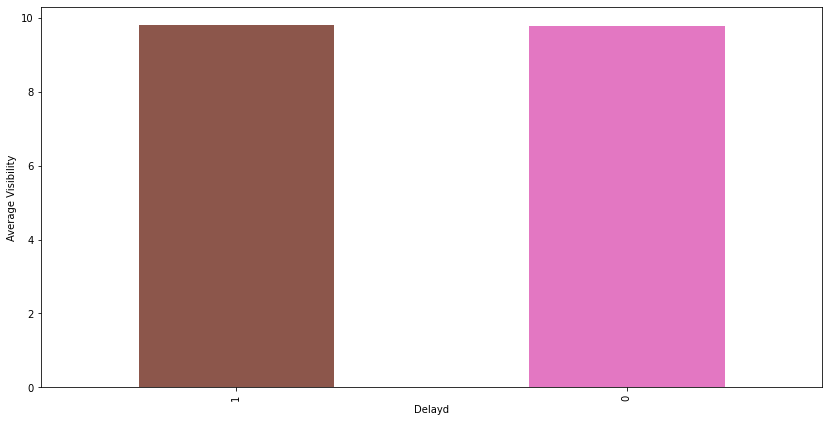

In [33]:
#bivariate analysis between trip distance and trip days
new_df3 = mod_df.groupby(['DepDel15'])['Visibility'].mean()
new_df3 = new_df3.sort_values(ascending=False)
new_df3.plot(kind='bar', stacked=True, color = ['C5','C6'], width = 0.5, figsize=(14,7))
plt.xlabel('Delayd')
plt.ylabel('Average Visibility')
plt.show()

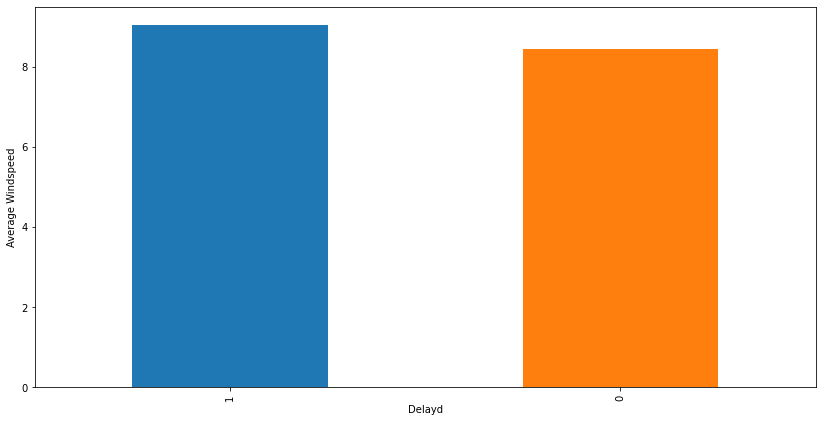

In [34]:
#bivariate analysis between trip distance and trip days
new_df4 = mod_df.groupby(['DepDel15'])['WindSpeed'].mean()
new_df4 = new_df4.sort_values(ascending=False)
new_df4.plot(kind='bar', stacked=False, color = ['C0','C1'],  width = 0.5, figsize=(14,7))
plt.xlabel('Delayd')
plt.ylabel('Average Windspeed')
plt.show()

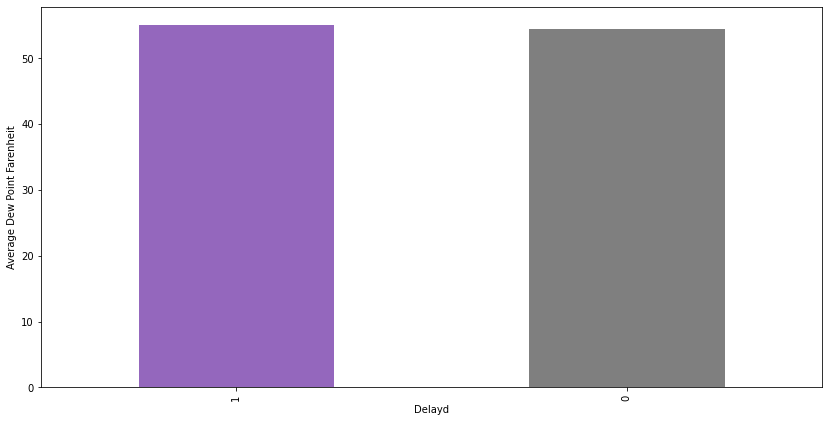

In [35]:
#bivariate analysis between trip distance and trip days
new_df5 = mod_df.groupby(['DepDel15'])['DewPointFarenheit'].mean()
new_df5 = new_df5.sort_values(ascending=False)
new_df5.plot(kind='bar', stacked=True, color = ['C4','C7'], width = 0.5, figsize=(14,7))
plt.xlabel('Delayd')
plt.ylabel('Average Dew Point Farenheit')
plt.show()

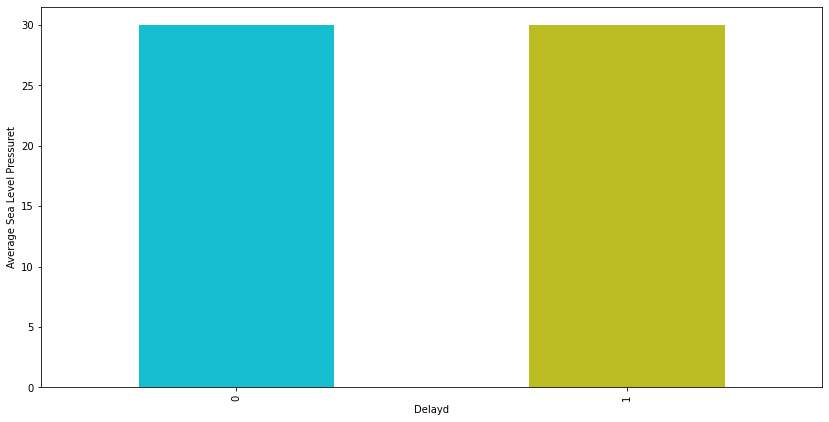

In [36]:
#bivariate analysis between trip distance and trip days
new_df6 = mod_df.groupby(['DepDel15'])['SeaLevelPressure'].mean()
new_df6 = new_df6.sort_values(ascending=False)
new_df6.plot(kind='bar', stacked=True, color = ['C9','C8'], width = 0.5, figsize=(14,7))
plt.xlabel('Delayd')
plt.ylabel('Average Sea Level Pressuret')
plt.show()

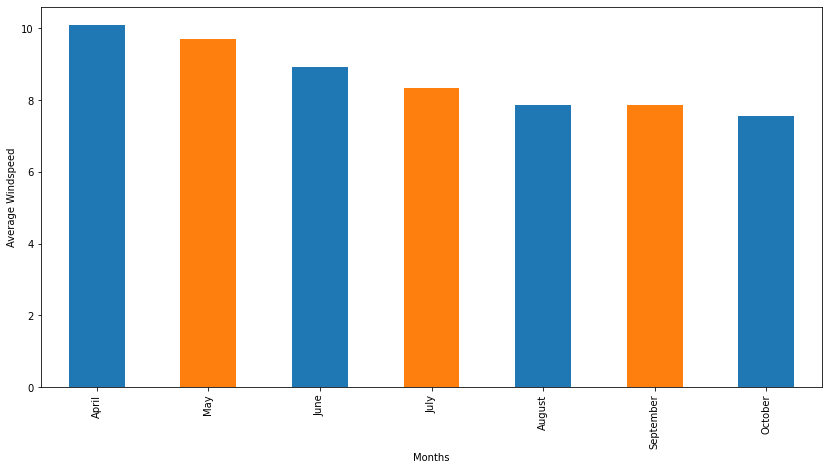

In [37]:
#bivariate analysis between trip distance and trip days
new_df7 = mod_df.groupby(['Month'])['WindSpeed'].mean()
new_df7 = new_df7.sort_values(ascending=False)
new_df7.plot(kind='bar', stacked=False, color = ['C0','C1'],  width = 0.5, figsize=(14,7))
plt.xlabel('Months')
plt.ylabel('Average Windspeed')
plt.show()

In [38]:
new_df.to_csv('gs://pak/Edited CSV/ModifiedFlightDataset.csv')